In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib notebook

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [8]:
df = df[['borough', 'major_category']]
df.head()

,borough,major_category
0,Croydon,Burglary
1,Greenwich,Violence Against the Person
2,Bromley,Violence Against the Person
3,Redbridge,Burglary
4,Wandsworth,Robbery


In [23]:
df_grouped = df.groupby(['borough', 'major_category']).size().reset_index()
df_grouped

,borough,major_category,0
0,Barking and Dagenham,Burglary,1846
1,Barking and Dagenham,Criminal Damage,3696
2,Barking and Dagenham,Drugs,2060
3,Barking and Dagenham,Fraud or Forgery,612
4,Barking and Dagenham,Other Notifiable Offences,1324
...,...,...,...
290,Westminster,Other Notifiable Offences,1693
291,Westminster,Robbery,1949
292,Westminster,Sexual Offences,259
293,Westminster,Theft and Handling,8400


In [30]:
table = pd.pivot_table(df_grouped, index=['borough'], columns=['major_category'])
table

0                                           \
major_category         Burglary Criminal Damage   Drugs Fraud or Forgery   
borough                                                                    
Barking and Dagenham     1846.0          3696.0  2060.0            612.0   
Barnet                   3511.0          6925.0  3660.0            628.0   
Bexley                   2439.0          4731.0  2534.0            388.0   
Brent                    2882.0          5655.0  3642.0            683.0   
Bromley                  3347.0          6454.0  3225.0            649.0   
Camden                   2303.0          4370.0  2652.0            619.0   
City of London             48.0            85.0    69.0              NaN   
Croydon                  3561.0          7270.0  4143.0            688.0   
Ealing                   3191.0          6489.0  3940.0            654.0   
Enfield                  3079.0          6073.0  3401.0            756.0   
Greenwich                2573.0          5001.0  2980.0            487.0   
Hackney                  2438.0          4700.0  3021.0            582.0   
Hammersmith and Fulham   1832.0          3776.0  2488.0            443.0   
Haringey                 2449.0          4797.0  2787.0            816.0   
Harrow                   2291.0          4414.0  2506.0            371.0   
Havering                 2542.0          4915.0  2543.0            415.0   
Hillingdon               2731.0          5331.0  2943.0            710.0   
Hounslow                 2425.0          4606.0  2629.0            569.0   
Islington                2121.0          4045.0  2583.0            426.0   
Kensington and Chelsea   1643.0          3555.0  2118.0            458.0   
Kingston upon Thames     1640.0          3319.0  1732.0            314.0   
Lambeth                  2924.0          6001.0  3929.0            748.0   
Lewisham                 2905.0          5643.0  3373.0            862.0   
Merton                   2007.0          4140.0  2286.0            469.0   
Newham                   2771.0          5555.0  3174.0            812.0   
Redbridge                2682.0          5291.0  2940.0            660.0   
Richmond upon Thames     1934.0          3856.0  1757.0            220.0   
Southwark                2828.0          5520.0  3485.0            924.0   
Sutton                   2020.0          3906.0  2069.0            241.0   
Tower Hamlets            2407.0          4695.0  2975.0            400.0   
Waltham Forest           2554.0          4843.0  2794.0            590.0   
Wandsworth               3026.0          5934.0  3185.0            652.0   
Westminster              2114.0          4406.0  2546.0            675.0   

                                                                          \
major_category         Other Notifiable Offences Robbery Sexual Offences   
borough                                                                    
Barking and Dagenham                      1324.0  1694.0           194.0   
Barnet                                    2465.0  3052.0           290.0   
Bexley                                    1614.0  1956.0           154.0   
Brent                                     2249.0  2667.0           264.0   
Bromley                                   2251.0  2770.0           221.0   
Camden                                    1794.0  2152.0           205.0   
City of London                              34.0    50.0             NaN   
Croydon                                   2328.0  3394.0           436.0   
Ealing                                    2461.0  2919.0           308.0   
Enfield                                   2344.0  2708.0           299.0   
Greenwich                                 1693.0  2379.0           225.0   
Hackney                                   2048.0  2263.0           335.0   
Hammersmith and Fulham                    1702.0  1702.0           342.0   
Haringey                                  1857.0  2217.0           341.0   
H

In [33]:
table = table.fillna(0).astype(int)
table

0                                         \
major_category         Burglary Criminal Damage Drugs Fraud or Forgery   
borough                                                                  
Barking and Dagenham       1846            3696  2060              612   
Barnet                     3511            6925  3660              628   
Bexley                     2439            4731  2534              388   
Brent                      2882            5655  3642              683   
Bromley                    3347            6454  3225              649   
Camden                     2303            4370  2652              619   
City of London               48              85    69                0   
Croydon                    3561            7270  4143              688   
Ealing                     3191            6489  3940              654   
Enfield                    3079            6073  3401              756   
Greenwich                  2573            5001  2980              487   
Hackney                    2438            4700  3021              582   
Hammersmith and Fulham     1832            3776  2488              443   
Haringey                   2449            4797  2787              816   
Harrow                     2291            4414  2506              371   
Havering                   2542            4915  2543              415   
Hillingdon                 2731            5331  2943              710   
Hounslow                   2425            4606  2629              569   
Islington                  2121            4045  2583              426   
Kensington and Chelsea     1643            3555  2118              458   
Kingston upon Thames       1640            3319  1732              314   
Lambeth                    2924            6001  3929              748   
Lewisham                   2905            5643  3373              862   
Merton                     2007            4140  2286              469   
Newham                     2771            5555  3174              812   
Redbridge                  2682            5291  2940              660   
Richmond upon Thames       1934            3856  1757              220   
Southwark                  2828            5520  3485              924   
Sutton                     2020            3906  2069              241   
Tower Hamlets              2407            4695  2975              400   
Waltham Forest             2554            4843  2794              590   
Wandsworth                 3026            5934  3185              652   
Westminster                2114            4406  2546              675   

                                                                          \
major_category         Other Notifiable Offences Robbery Sexual Offences   
borough                                                                    
Barking and Dagenham                        1324    1694             194   
Barnet                                      2465    3052             290   
Bexley                                      1614    1956             154   
Brent                                       2249    2667             264   
Bromley                                     2251    2770             221   
Camden                                      1794    2152             205   
City of London                                34      50               0   
Croydon                                     2328    3394             436   
Ealing                                      2461    2919             308   
Enfield                                     2344    2708             299   
Greenwich                                   1693    2379             225   
Hackney                                     2048    2263             335   
Hammersmith and Fulham                      1702    1702             342   
Haringey                                    1857    2217             341   
Harrow                                      1615    1859             191 

<IPython.core.display.Javascript object>


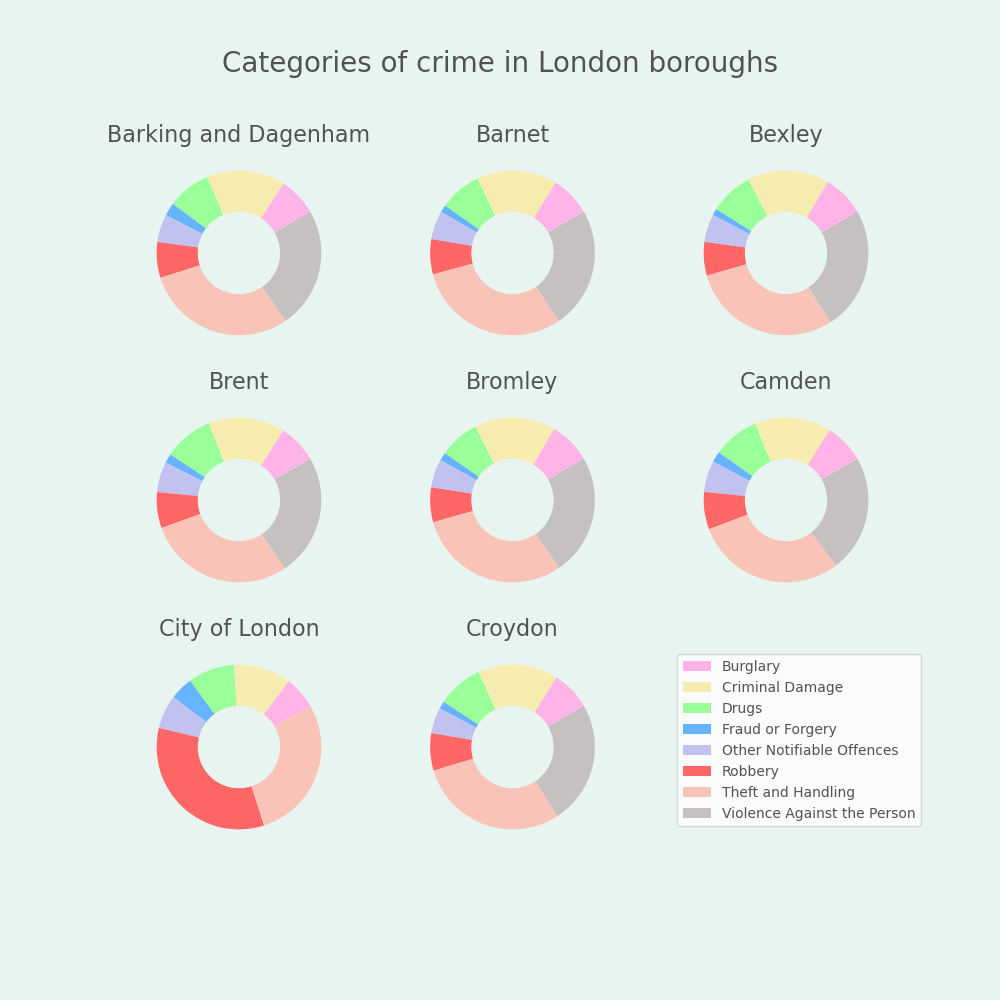

In [150]:
font_color = '#525252'
colors = ['#ffb3e6', '#f7ecb0', '#99ff99', '#66b3ff', '#c2c2f0','#ff6666', '#f9c3b7', '#c5c1c0']

fig, axes = plt.subplots(3, 3, figsize=(10, 10), facecolor='#e8f4f0')
# To remove the last plot
fig.delaxes(ax= axes[2,2])

for i, (idx, row) in enumerate(table.head(8).iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, startangle=30, wedgeprops=dict(width=.5), colors=colors)
    ax.set_title(idx, fontsize=16, color=font_color)
    
    # [x[1] for x in row.index]: to access the second value in a tulpe, which is row.index
    legend = plt.legend([x[1] for x in row.index], 
                        bbox_to_anchor=(1.3, .95), 
                        loc='upper left', 
                        borderaxespad=0., 
                        ncol=1, 
                        fancybox=True)
    for text in legend.get_texts():
        plt.setp(text, color = font_color)

fig.subplots_adjust(wspace=.2)

title = fig.suptitle('Categories of crime in London boroughs', y=.95, fontsize=20, color=font_color)
plt.subplots_adjust(top=0.85, bottom=0.15)

In [151]:
filename = 'pie-chart'
plt.savefig(filename+'.png', facecolor=('#e8f4f0'))